In [1]:
if (!requireNamespace("BiocManager", quietly = TRUE))
  install.packages("BiocManager")

In [2]:
BiocManager::install("DESeq2")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'DESeq2'”


In [3]:
install.packages("pheatmap")

Installing package into ‘/home/sasha/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



In [4]:
library("DESeq2")
library("pheatmap")

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loading required package: SummarizedExperiment

Loading required package: MatrixGe

In [5]:
info   <- read.table("ALL.info", header=TRUE, row.names="sample")
counts <- as.matrix(read.table("ALL.counts", header=TRUE, row.names="geneID"))

dds <- DESeqDataSetFromMatrix(countData = counts, colData = info, design = ~ condition)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [6]:
head(info)

,id,condition
,<chr>,<chr>
c1,SRR3414635,control
c2,SRR3414636,control
c3,SRR3414637,control
r1,SRR3414629,reprogramming
r2,SRR3414630,reprogramming
r3,SRR3414631,reprogramming


In [7]:
head(counts)

,c1,c2,c3,r1,r2,r3
ENSMUSG00000000001.4,3466,3532,4078,4507,3964,5757
ENSMUSG00000000003.15,0,0,0,0,0,0
ENSMUSG00000000028.15,152,137,152,348,275,472
ENSMUSG00000000031.16,55721,48392,56187,64722,33333,65188
ENSMUSG00000000037.17,43,44,53,79,70,92
ENSMUSG00000000049.11,10,8,11,4,1,1


In [8]:
# Tell the DDS which columns correspond to the 'reference' level of gene expression
dds$condition <- relevel(dds$condition, ref="control")

dds <- DESeq(dds)
res <- results(dds, alpha=0.01)   # Specify a more strict threshold on padj. This threshold is called 'alpha'

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



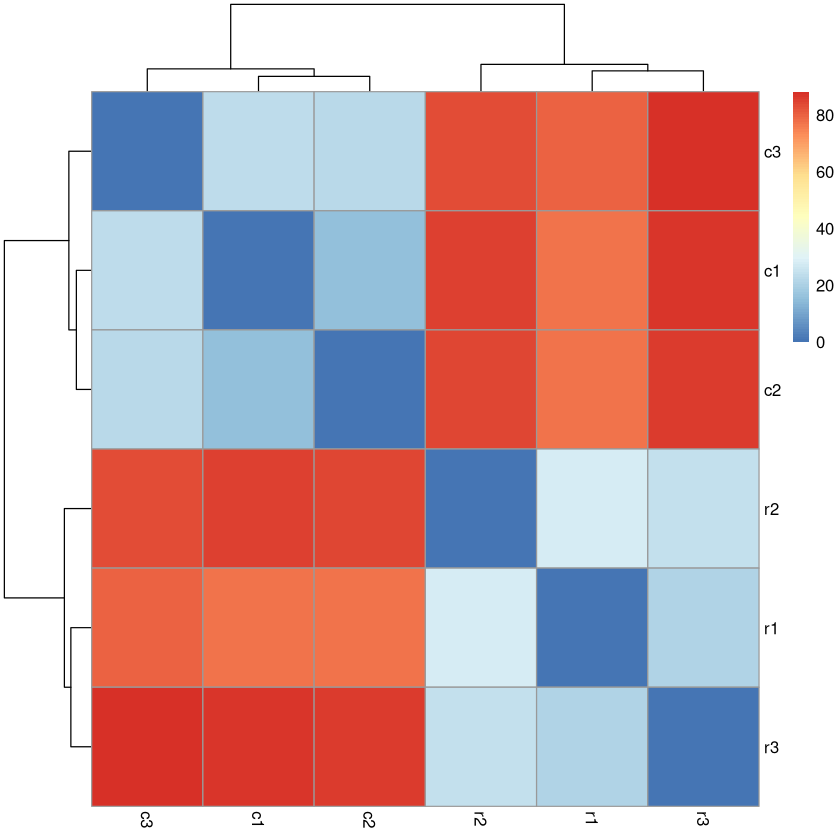

In [9]:
rld <- rlog(dds)
sampleDists <- dist(t(assay(rld)))
sampleDistMatrix <- as.matrix(sampleDists)
pheatmap(sampleDistMatrix, clustering_distance_rows=sampleDists, clustering_distance_cols=sampleDists)

In [10]:
resOrdered <- res[order(res$padj),]
resSignificant <- subset(resOrdered, padj < 0.01)
write.table(resSignificant, "differentially_expressed_genes.txt", sep="\t", row.names=TRUE, quote = FALSE)

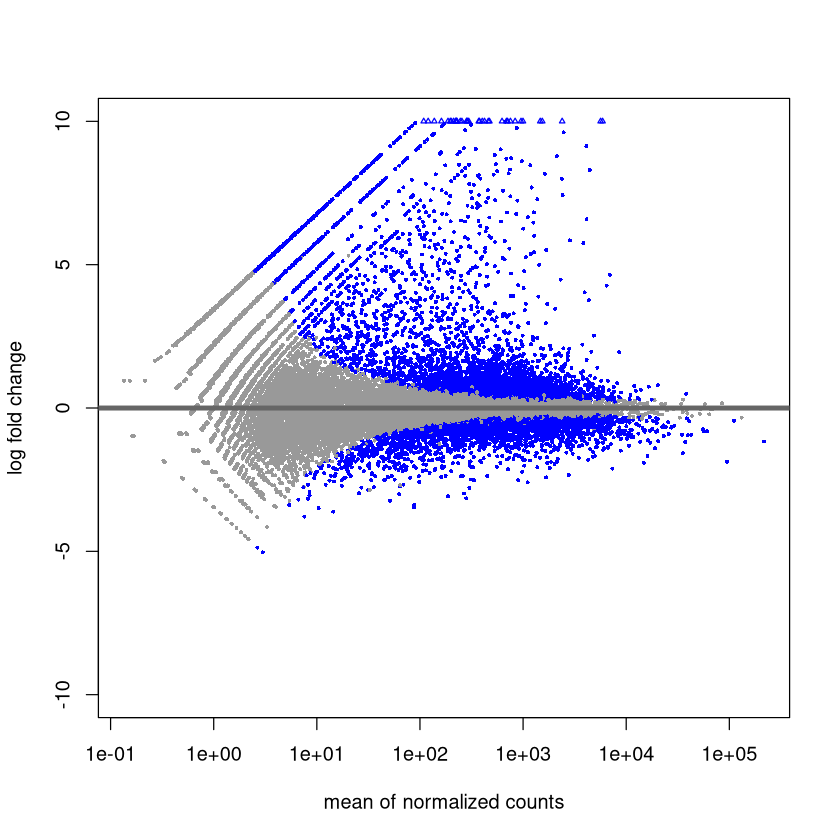

In [11]:
plotMA(res, ylim=c(-10,10))

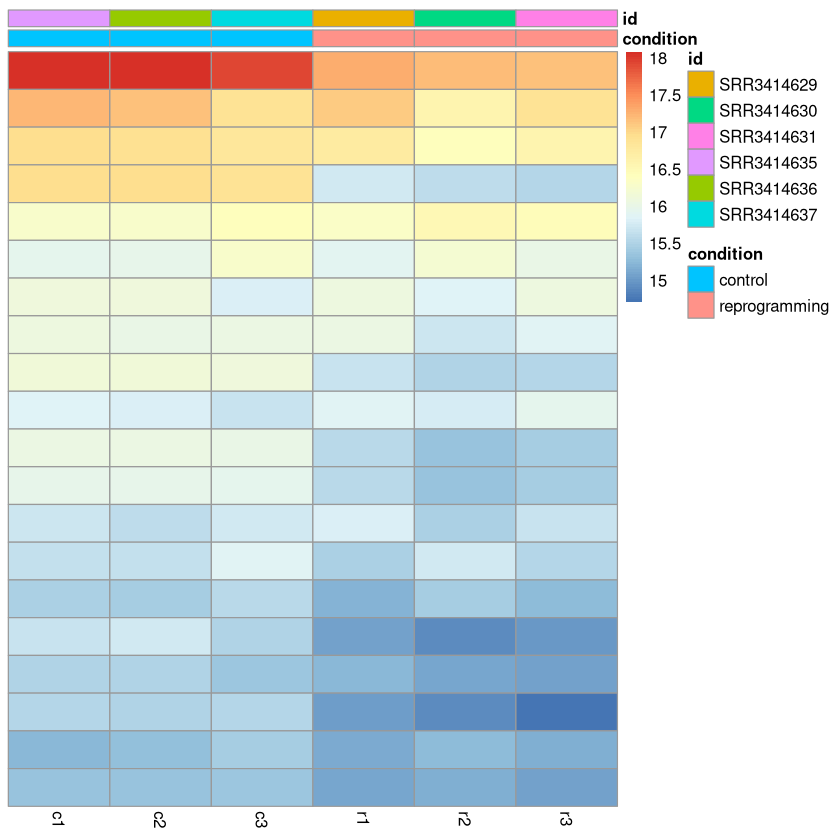

In [12]:
select <- order(rowMeans(counts(dds,normalized=TRUE)),decreasing=TRUE)[1:20]
df <- as.data.frame(colData(dds)[,c("condition","id")])
pheatmap(assay(rld)[select,], cluster_rows=FALSE, show_rownames=FALSE,cluster_cols=FALSE, annotation_col=df)

In [13]:
# get maximum fold change
resSignificant[order(-resSignificant$log2FoldChange)]

log2 fold change (MLE): condition reprogramming vs control 
Wald test p-value: condition reprogramming vs control 
DataFrame with 6729 rows and 6 columns
                       baseMean log2FoldChange     lfcSE      stat       pvalue
                      <numeric>      <numeric> <numeric> <numeric>    <numeric>
ENSMUSG00000058354.7    625.053        12.7345  1.183254  10.76225  5.18863e-27
ENSMUSG00000040728.15   422.308        12.1686  1.187418  10.24797  1.20858e-24
ENSMUSG00000039269.5    401.965        12.0995  1.184576  10.21417  1.71331e-24
ENSMUSG00000035557.9   5647.172        11.8829  0.493665  24.07077 5.06065e-128
ENSMUSG00000046180.11   297.237        11.6622  1.194256   9.76522  1.58762e-22
...                         ...            ...       ...       ...          ...
ENSMUSG00000020542.18  10.39541       -3.49410  0.861460  -4.05603  4.99146e-05
ENSMUSG00000038071.3   14.44750       -3.61443  0.724033  -4.99208  5.97338e-07
ENSMUSG00000115759.1    7.57052       -3.78945

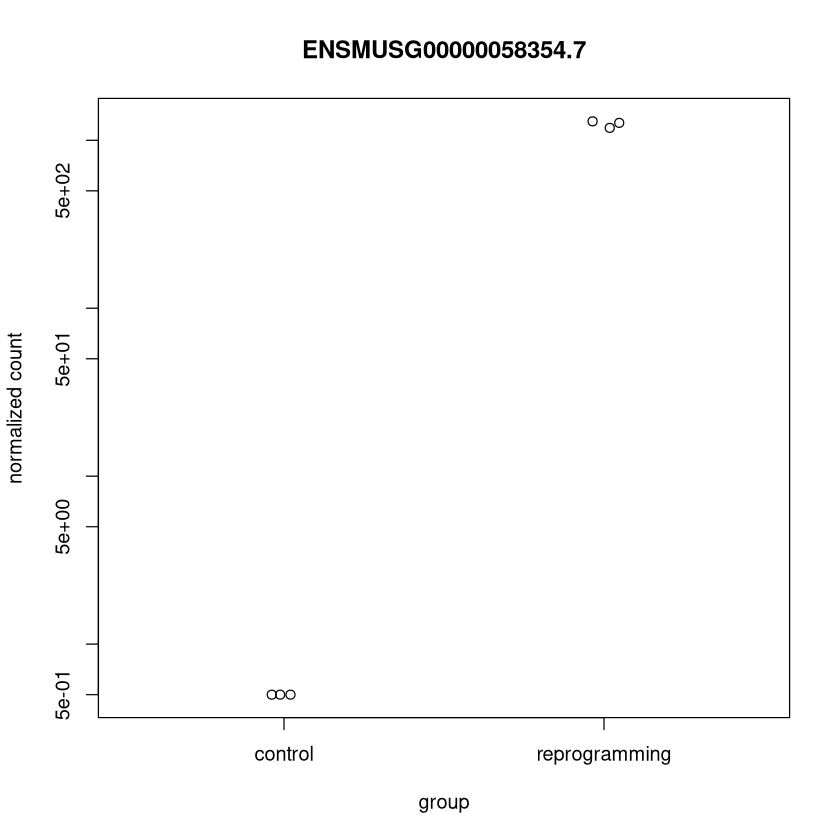

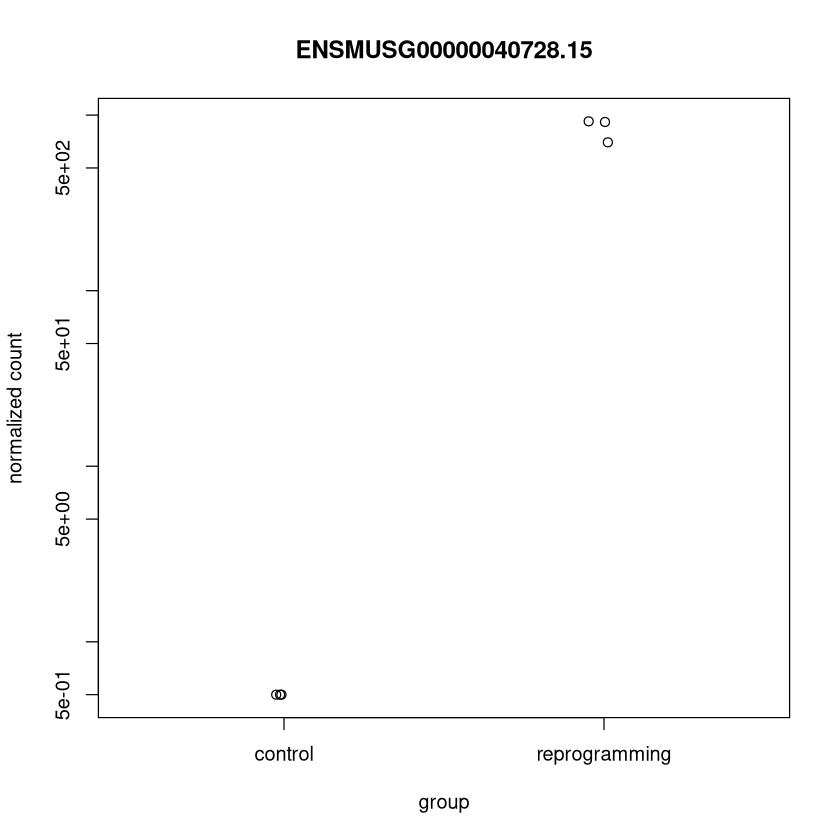

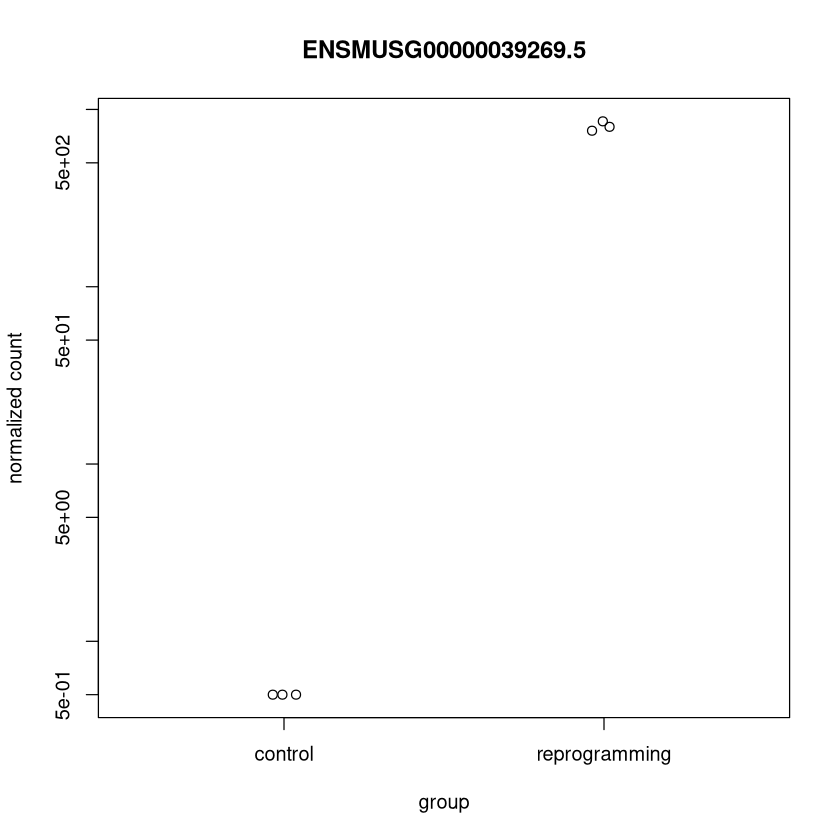

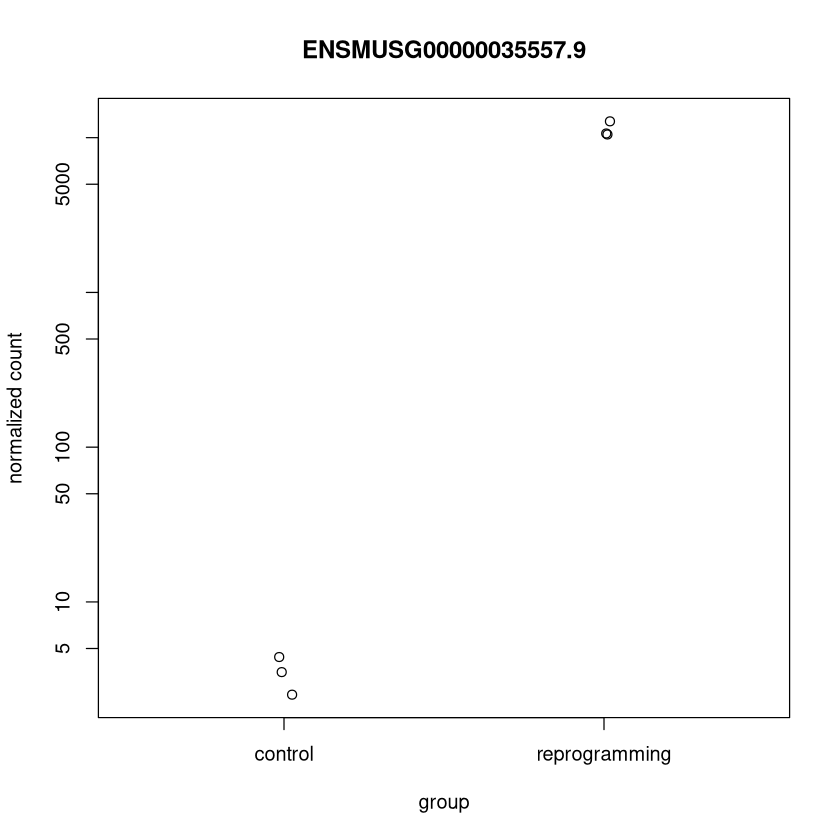

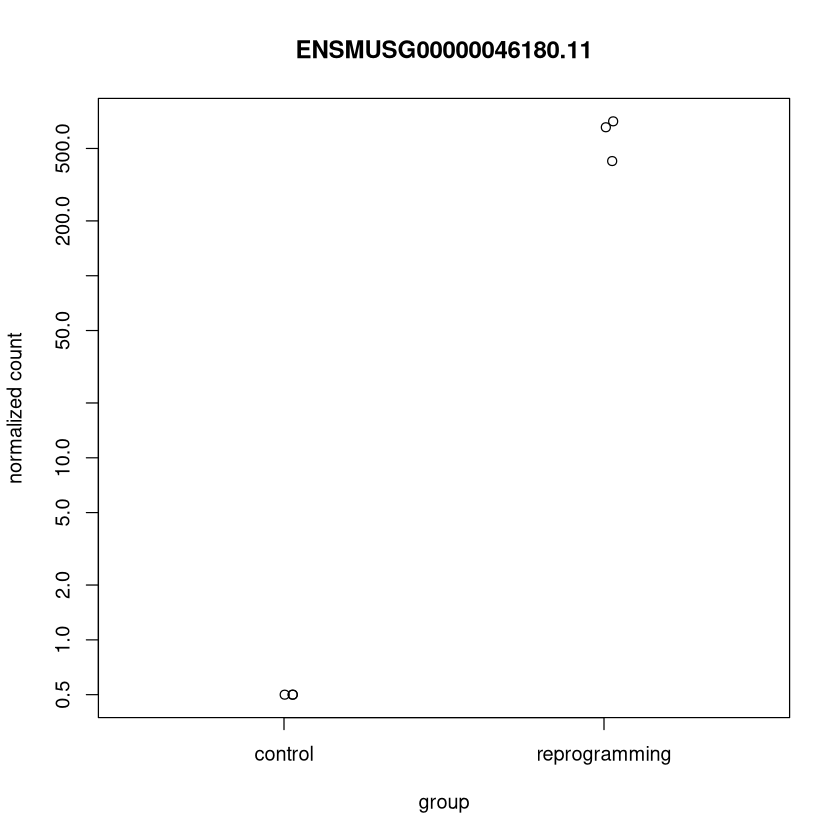

In [14]:
plotCounts(dds, gene="ENSMUSG00000058354.7", intgroup="condition")
plotCounts(dds, gene="ENSMUSG00000040728.15", intgroup="condition")
plotCounts(dds, gene="ENSMUSG00000039269.5", intgroup="condition")
plotCounts(dds, gene="ENSMUSG00000035557.9", intgroup="condition")
plotCounts(dds, gene="ENSMUSG00000046180.11", intgroup="condition")